In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
#seperating dependent and independent values
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [4]:
#scaling dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)


In [5]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight='balanced')
classifier=DTC()

In [7]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [10]:

predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3559
           1       0.44      0.46      0.45       855

    accuracy                           0.78      4414
   macro avg       0.65      0.66      0.66      4414
weighted avg       0.79      0.78      0.78      4414



In [14]:
!pip install graphviz

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file='tree_viz',
               max_depth=None,feature_names=X.columns,label='none',impurity =False)

In [15]:
from graphviz import render
render(filepath='tree_viz',format='png',engine='neato')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [16]:

#hyperparameter tuning
classifier=DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    
    predict=model.predict(x2)
    f2=f1_score(y2,predict)

    return f1,f2

In [18]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1 score')
    plt.show()

In [19]:
maxdepth=[i for i in range(1,50)]
train=[]
test=[]
for i in maxdepth:
    model=DTC(class_weight='balanced',max_depth=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

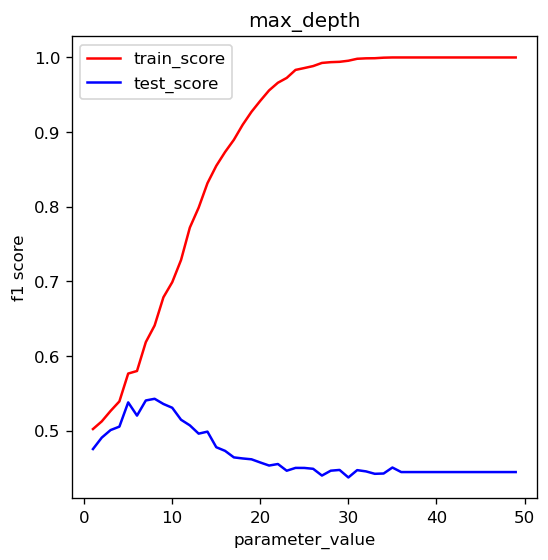

In [20]:
effect(train,test,range(1,50),'max_depth')

In [21]:
min_samples=[i for i in range(2,5000,25)]
train=[]
test=[]

for i in min_samples:
    model=DTC(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)
    

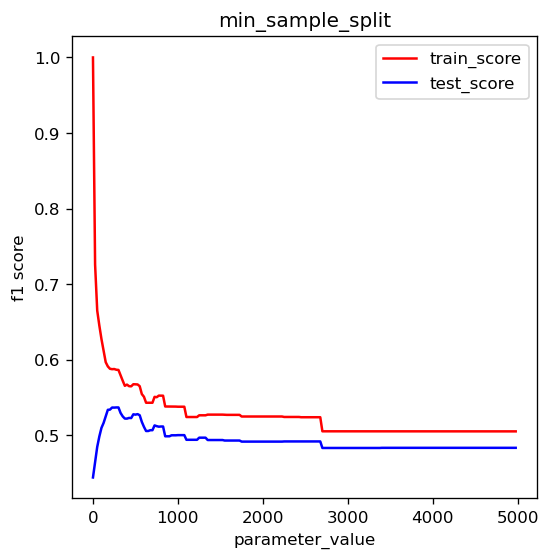

In [22]:
effect(train,test,range(2,5000,25),'min_sample_split')

In [29]:
maxleafnodes=[i for i in range(2,200,10)]
train=[]
test=[]
for i in maxleafnodes:
    model=DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

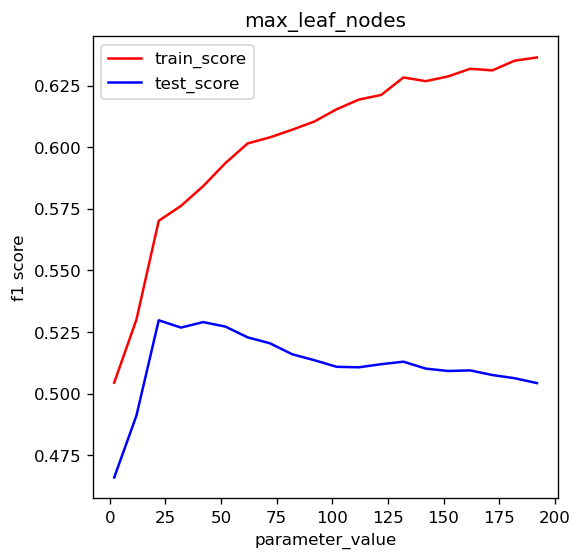

In [30]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

In [37]:
minsamplesleaf=[i for i in range(2,4000,25)]
train=[]
test=[]
for i in minsamplesleaf:
    model=DTC(class_weight='balanced',min_samples_leaf=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

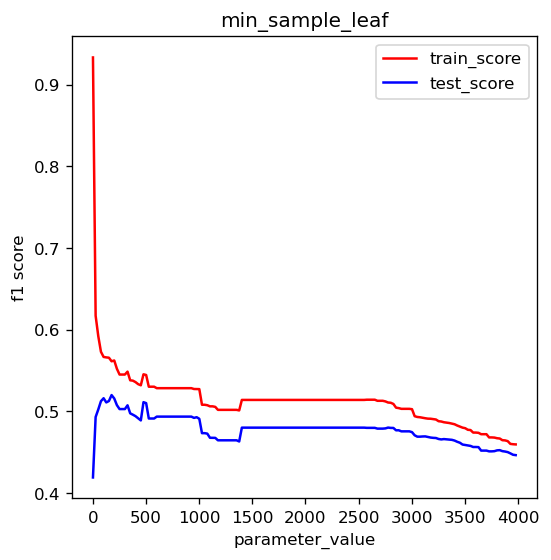

In [38]:
effect(train,test,range(2,4000,25),'min_sample_leaf')

In [44]:
model=DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values(ascending=True)


Text(0.5, 1.0, 'feature importance')

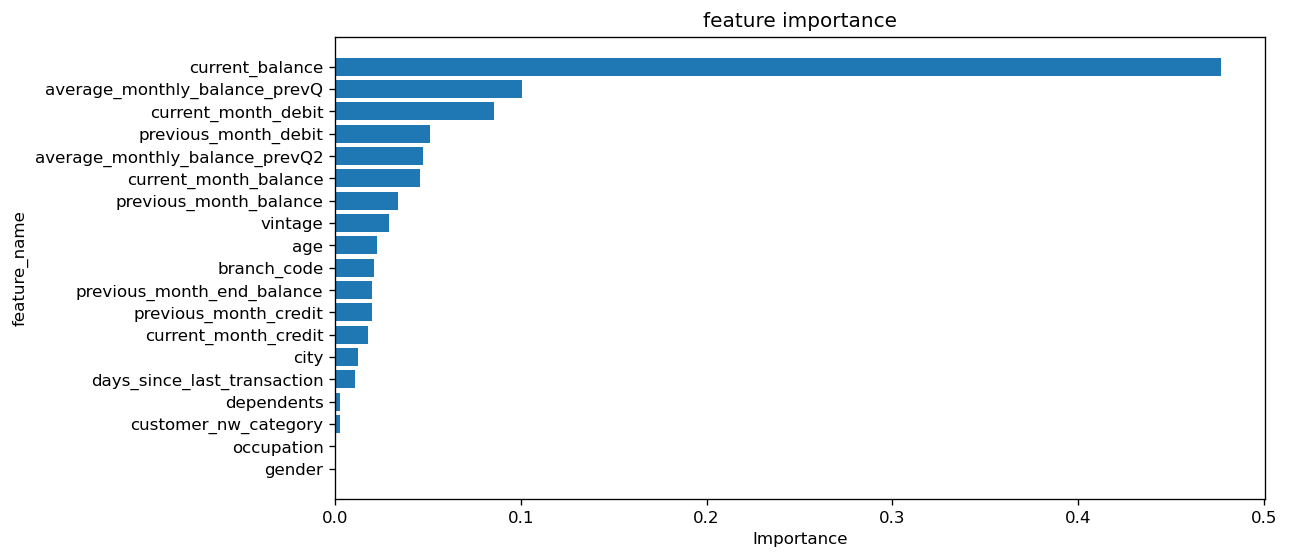

In [45]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')